In [3]:
import numpy as np
from copy import deepcopy

x = np.array([[1,1]])
y = np.array([[0]])
W = [
  np.array([[-0.0053, 0.3793],
  [-0.5820, -0.5204],
  [-0.2723, 0.1896]], dtype=np.float32).T,
  np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
  np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T,
  np.array([-0.5516], dtype=np.float32)
]
#Activation Functions
def sigmoid(x):
  out = 1/(1+np.exp(-x))
  return out

def tanh(x):
  out = ( np.exp(x) - np.exp(-x) ) / ( np.exp(x) + np.exp(-x) )
  return out

def relu(x):
  # if x > 0:
  #   return x
  # return 0 
  out = np.where(x>0, x, 0)
  return out

def linear(x):
  return x

def softmax(x):
  out = (np.exp(x)) / (np.sum(np.exp(x)))

#Loss Functions
def mean_square_error(true, predicted):
  out = np.mean(np.square(predicted - true))
  return out

def mean_absolute_error(true, predicted):
  out = np.mean(np.abs(true - predicted))
  return out

def binary_cross_entropy(true, predicted):
  out = -np.mean(np.sum( (true * np.log(predicted)) + (( 1 - true ) * np.log( 1- predicted )) ))
  return out

def categorical_cross_entropy(true, predicted):
  out = -np.mean( np.sum((true * np.log(predicted))))
  return out

#Gradient Descent
def update_weights(inputs, outputs, weights, lr):
  original_weights = deepcopy(weights)
  temp_weights = deepcopy(weights)
  updated_weights = deepcopy(weights)
  original_loss = feed_forward(inputs, outputs, original_weights)

  for i, layer in enumerate(original_weights):
    for index, weight in np.ndenumerate(layer):
      temp_weights = deepcopy(weights)
      temp_weights[i][index] += 0.0001
      _loss_plus = feed_forward(inputs, outputs, temp_weights)
      grad = (_loss_plus - original_loss)/(0.0001)
      updated_weights[i][index] -= grad*lr
      if(i % 2 == 0):
        print('weight value:', \
        np.round(original_weights[i][index],2), \
        'original loss:', np.round(original_loss,2), \
        'loss_plus:', np.round(_loss_plus,2), \
        'gradient:', np.round(grad,2), \
        'updated_weights:', \
        np.round(updated_weights[i][index],2))
  return updated_weights, original_loss

def feed_forward(inputs, outputs, weights):
  pre_hidden = np.dot(inputs, weights[0]) + weights[1]
  hidden = sigmoid(pre_hidden)
  pred_output = np.dot(hidden, weights[2]) + weights[3]
  error = mean_square_error(pred_output, outputs)
  return error

weight value: -0.01 original loss: 0.33 loss_plus: 0.33 gradient: -0.04 updated_weights: -0.0
weight value: -0.58 original loss: 0.33 loss_plus: 0.33 gradient: 0.05 updated_weights: -0.58
weight value: -0.27 original loss: 0.33 loss_plus: 0.33 gradient: 0.03 updated_weights: -0.27
weight value: 0.38 original loss: 0.33 loss_plus: 0.33 gradient: -0.04 updated_weights: 0.38
weight value: -0.52 original loss: 0.33 loss_plus: 0.33 gradient: 0.05 updated_weights: -0.52
weight value: 0.19 original loss: 0.33 loss_plus: 0.33 gradient: 0.03 updated_weights: 0.19
weight value: 0.15 original loss: 0.33 loss_plus: 0.33 gradient: -0.68 updated_weights: 0.16
weight value: -0.17 original loss: 0.33 loss_plus: 0.33 gradient: -0.43 updated_weights: -0.17
weight value: -0.11 original loss: 0.33 loss_plus: 0.33 gradient: -0.54 updated_weights: -0.11
weight value: -0.0 original loss: 0.31 loss_plus: 0.31 gradient: -0.04 updated_weights: -0.0
weight value: -0.58 original loss: 0.31 loss_plus: 0.31 gradien

Text(0, 0.5, 'Loss value')

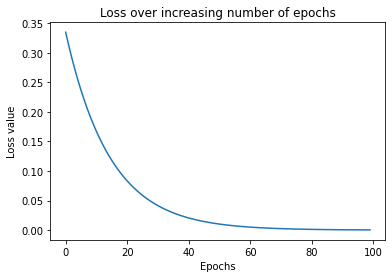

In [4]:
losses = []
for epoch in range(100):
  W, loss = update_weights(x,y,W,0.01)
  losses.append(loss)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss value')